<a href="https://colab.research.google.com/github/krajesh00/Cyclica-Data-Hackathon-Challenge/blob/master/Cyclica_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cyclica Datathon Classification Challenge

**Table of Contents**
1. Data Ingestion and Cleaning
2. Exploratory Analysis
    - Outliers
    - Univariate
    - Multivariate
    - Correlations
3. Feature Engineering
    - Feature Selection
    - Feature Importance
4. Model Selection, Training, Evaluation
5. Deep Learning Approach
6. Submission

In [ ]:
'''
To-do List:
- Check if dataset is balanced or not (apply balancing [i.e. undersampling/oversampling] if needed)
- Verify One-hot encoding for data cleaning
- Get number of appearences of each amino acid (One-hot encoded columns)
- Normalize/MinMax scale appropriate columns
- Find anomalies/outliers using inter-quartile ranges
- Find Correlations
- Feature Engineering (possibly categorical encoding) for Entry and Entry ID columns

- Use GridSearchCV or alternatives for hyperparameter tuning
- Implement HuggingFace Gradio interface

Learning Outcomes:
- Use L-BFGS when dataset is small (ideally <100000 rows)
- Use Ray for distributed tuning and KerasTuner for tuning keras models
'''

## 1. Data Ingestion and Cleaning

In [ ]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
pd.set_option('display.max_columns', None)

In [ ]:
# Importing Data from Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')
os.chdir("drive/MyDrive/Cyclica_Datathon")

Mounted at /content/drive


In [ ]:
test = pd.read_csv("af2_dataset_testset_unlabeled.csv")
train = pd.read_csv("af2_dataset_training_labeled.csv")

In [ ]:
test.shape

(107624, 50)

**Reference of Dataframe names throughout the project**

<table>
    <tr>
        <th>DataFrame</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><i>train</i></td>
        <td>Initial training df based on dataset csv</td>
    </tr>
    <tr>
        <td><i>train_cleaned</i></td>
        <td>Training df after data cleaning and EDA</td>
    </tr>
    <tr>
        <td><i>train_scaled1</i></td>
        <td>Data scaled for classical ml experiments</td>
    </tr>
    <tr>
        <td><i>train_scaled2</i></td>
        <td>Data scaled for deep learning experiments</td>
    </tr>
</table>



In [ ]:
train.head()

,Unnamed: 0,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,feat_L,feat_M,feat_N,feat_P,feat_Q,feat_R,feat_S,feat_T,feat_V,feat_W,feat_Y,annotation_atomrec,feat_PHI,feat_PSI,feat_TAU,feat_THETA,feat_BBSASA,feat_SCSASA,feat_pLDDT,feat_DSSP_H,feat_DSSP_B,feat_DSSP_E,feat_DSSP_G,feat_DSSP_I,feat_DSSP_T,feat_DSSP_S,feat_DSSP_6,feat_DSSP_7,feat_DSSP_8,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand
0,0,M,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,M,0.000000,2.257610,-2.375020,1.956201,80.020602,137.023818,38.49,False,False,False,False,False,False,False,0,0.0,2,-0.3,0,0.0,47,-0.0,-26.499001,-4.742,-35.189999,GEMI5_HUMAN,0,False
1,1,G,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,G,-1.100680,2.224168,-2.654037,1.900792,69.542382,0.000000,46.08,False,False,False,False,False,False,False,1,-0.0,2,-0.2,0,0.0,0,0.0,-25.158001,-1.342,-34.104000,GEMI5_HUMAN,1,False
2,2,Q,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Q,-1.295398,2.676551,-1.696727,2.458310,23.387401,88.587659,65.42,False,False,False,False,False,False,False,-2,-0.3,708,-0.1,1,-0.0,-1,-0.0,-21.926001,-1.641,-32.175999,GEMI5_HUMAN,2,False
3,3,E,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,E,-2.352796,2.665542,-2.810012,2.054226,4.908812,44.521273,85.17,False,False,False,False,False,False,False,-2,-0.2,2,-0.1,706,-0.1,705,-0.0,-22.073999,0.654,-29.171000,GEMI5_HUMAN,3,False
4,4,P,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,P,-1.134474,2.612150,-2.754863,2.272191,9.742674,52.613700,93.24,False,False,False,False,False,False,False,0,0.0,2,-0.3,0,0.0,705,-0.2,-19.783001,2.670,-26.858999,GEMI5_HUMAN,4,False


In [ ]:
train.sample(5)

,Unnamed: 0,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,feat_L,feat_M,feat_N,feat_P,feat_Q,feat_R,feat_S,feat_T,feat_V,feat_W,feat_Y,annotation_atomrec,feat_PHI,feat_PSI,feat_TAU,feat_THETA,feat_BBSASA,feat_SCSASA,feat_pLDDT,feat_DSSP_H,feat_DSSP_B,feat_DSSP_E,feat_DSSP_G,feat_DSSP_I,feat_DSSP_T,feat_DSSP_S,feat_DSSP_6,feat_DSSP_7,feat_DSSP_8,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand
318769,242,D,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,D,-1.939785,0.241806,-1.763326,2.103757,35.860760,70.624097,88.20,False,False,False,True,False,False,False,-3,-1.6,-1,-0.3,2,-0.0,-2,-0.2,10.788000,-15.369000,-15.733000,CAN3_HUMAN,242,False
304091,897,V,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,V,-2.182156,2.558889,-2.371570,1.836922,0.131205,2.507437,91.01,False,True,False,False,False,False,False,-3,-0.9,2,-0.5,145,-0.3,-3,-0.4,-15.526000,-15.658000,-21.326000,VGFR2_HUMAN,897,True
265707,642,P,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,P,-2.247400,-2.877092,1.903913,2.844326,33.676742,29.378375,35.01,False,False,False,False,False,False,False,0,0.0,447,-0.2,0,0.0,-1,-0.1,-62.754002,-47.051998,-7.737000,WNK3_HUMAN,642,False
404340,136,E,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,E,-2.134911,2.629427,-1.906749,1.983219,4.969799,116.538382,93.21,False,False,True,False,False,False,False,-47,-0.1,2,-0.2,-46,-0.1,-2,-0.1,19.125000,26.815001,-35.900002,ERAP1_HUMAN,136,False
385860,37,F,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F,-0.981738,-0.835748,0.900864,1.617838,9.188068,75.588787,94.27,True,False,False,False,False,False,False,-4,-2.3,4,-2.1,-5,-0.3,5,-0.2,13.837000,-18.408001,-48.942001,ABCC8_HUMAN,37,False


In [ ]:
train.shape

(497166, 51)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497166 entries, 0 to 497165
Data columns (total 51 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           497166 non-null  int64  
 1   annotation_sequence  497166 non-null  object 
 2   feat_A               497166 non-null  bool   
 3   feat_C               497166 non-null  bool   
 4   feat_D               497166 non-null  bool   
 5   feat_E               497166 non-null  bool   
 6   feat_F               497166 non-null  bool   
 7   feat_G               497166 non-null  bool   
 8   feat_H               497166 non-null  bool   
 9   feat_I               497166 non-null  bool   
 10  feat_K               497166 non-null  bool   
 11  feat_L               497166 non-null  bool   
 12  feat_M               497166 non-null  bool   
 13  feat_N               497166 non-null  bool   
 14  feat_P               497166 non-null  bool   
 15  feat_Q           

In [ ]:
train.isnull().sum()

Unnamed: 0                 0
annotation_sequence        0
feat_A                     0
feat_C                     0
feat_D                     0
feat_E                     0
feat_F                     0
feat_G                     0
feat_H                     0
feat_I                     0
feat_K                     0
feat_L                     0
feat_M                     0
feat_N                     0
feat_P                     0
feat_Q                     0
feat_R                     0
feat_S                     0
feat_T                     0
feat_V                     0
feat_W                     0
feat_Y                     0
annotation_atomrec     12689
feat_PHI                   0
feat_PSI                   0
feat_TAU                   0
feat_THETA                 0
feat_BBSASA                0
feat_SCSASA                0
feat_pLDDT                 0
feat_DSSP_H                0
feat_DSSP_B                0
feat_DSSP_E                0
feat_DSSP_G                0
feat_DSSP_I   

In [ ]:
# Determining if the dataset is balanced
train['y_Ligand'].value_counts()

False    479912
True      17254
Name: y_Ligand, dtype: int64

In [ ]:
# Finding number of unique values in each column
print(train.apply(lambda col: len(col.unique())))

Unnamed: 0               7385
annotation_sequence        20
feat_A                      2
feat_C                      2
feat_D                      2
feat_E                      2
feat_F                      2
feat_G                      2
feat_H                      2
feat_I                      2
feat_K                      2
feat_L                      2
feat_M                      2
feat_N                      2
feat_P                      2
feat_Q                      2
feat_R                      2
feat_S                      2
feat_T                      2
feat_V                      2
feat_W                      2
feat_Y                      2
annotation_atomrec         21
feat_PHI               483754
feat_PSI               484478
feat_TAU               484478
feat_THETA             484478
feat_BBSASA            429217
feat_SCSASA            437481
feat_pLDDT               7956
feat_DSSP_H                 2
feat_DSSP_B                 2
feat_DSSP_E                 2
feat_DSSP_

In [ ]:
print(train['annotation_atomrec'].unique())
print(train['annotation_sequence'].unique())

['M' 'G' 'Q' 'E' 'P' 'R' 'T' 'L' 'S' 'N' 'W' 'Y' 'C' 'A' 'D' 'V' 'F' 'I'
 'H' 'K' nan]
['M' 'G' 'Q' 'E' 'P' 'R' 'T' 'L' 'S' 'N' 'W' 'Y' 'C' 'A' 'D' 'V' 'F' 'I'
 'H' 'K']


In [ ]:
train[train['annotation_atomrec'].isna()].sample(5)

,Unnamed: 0,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,feat_L,feat_M,feat_N,feat_P,feat_Q,feat_R,feat_S,feat_T,feat_V,feat_W,feat_Y,annotation_atomrec,feat_PHI,feat_PSI,feat_TAU,feat_THETA,feat_BBSASA,feat_SCSASA,feat_pLDDT,feat_DSSP_H,feat_DSSP_B,feat_DSSP_E,feat_DSSP_G,feat_DSSP_I,feat_DSSP_T,feat_DSSP_S,feat_DSSP_6,feat_DSSP_7,feat_DSSP_8,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand
447451,3148,Q,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,DMD_HUMAN,3148,False
276565,1585,V,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,HUWE1_HUMAN,1585,False
447562,3259,E,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,DMD_HUMAN,3259,False
208896,2034,T,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,MACF1_HUMAN,2034,False
211423,4561,T,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,MACF1_HUMAN,4561,False


In [ ]:
train.dropna()['y_Ligand'].value_counts()

False    467250
True      17227
Name: y_Ligand, dtype: int64

In [ ]:
# Validating that annotation_sequence and annotation_atomrec contain the same data
annotation_testing_df = train.dropna()
annotation_testing_df['annotation_atomrec'].equals(annotation_testing_df['annotation_sequence'])

True

In [ ]:
train_cleaned = train.drop(columns=['annotation_atomrec'])

In [ ]:
train_cleaned.shape

(497166, 50)

## 2. Exploratory Analysis

In [ ]:
train_cleaned.describe()

,Unnamed: 0,feat_PHI,feat_PSI,feat_TAU,feat_THETA,feat_BBSASA,feat_SCSASA,feat_pLDDT,feat_DSSP_6,feat_DSSP_7,feat_DSSP_8,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry_index
count,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,4.971660e+05,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000,497166.000000
mean,535.495128,-1.162007,0.780075,-0.108342,1.854782,16.746550,5.209644e+01,75.733749,-1.789849,-1.160675,1.754382,-1.140480,-0.053135,-0.177757,0.128386,-0.201625,-3.927826,1.956133,-1.099622,535.495128
std,665.740408,1.039634,1.520499,1.833996,0.469940,18.494097,4.792873e+01,26.971019,58.176800,1.058466,60.429611,1.062049,57.906105,0.156652,61.219479,0.232904,25.770530,20.641283,26.637590,665.740408
min,0.000000,-3.141557,-3.141564,-3.141578,0.000000,0.000000,-2.842171e-14,0.000000,-2281.000000,-4.000000,-2281.000000,-4.000000,-2280.000000,-1.800000,-2281.000000,-2.900000,-149.393997,-114.931000,-152.839005,0.000000
25%,172.000000,-1.686451,-0.654101,-2.067246,1.590771,1.239801,5.274057e+00,55.360000,-4.000000,-2.200000,-1.000000,-2.200000,-2.000000,-0.200000,-2.000000,-0.200000,-18.850000,-9.518750,-16.964001,172.000000
50%,365.000000,-1.199133,0.241335,0.775206,1.756220,8.788650,4.352778e+01,89.530000,-2.000000,-0.700000,2.000000,-0.600000,1.000000,-0.200000,-1.000000,-0.200000,-2.881000,1.206000,-0.681000,365.000000
75%,667.000000,-1.047934,2.297116,0.966645,2.122055,29.958422,8.623462e+01,95.960000,0.000000,-0.200000,4.000000,-0.200000,2.000000,-0.100000,2.000000,-0.100000,11.469000,13.148000,14.147000,667.000000
max,7384.000000,3.141575,3.141584,3.141568,3.137176,99.338342,2.200520e+02,98.980000,2281.000000,0.000000,2281.000000,-0.000000,2281.000000,0.000000,2282.000000,-0.000000,162.250000,103.135002,176.059998,7384.000000


<AxesSubplot:>

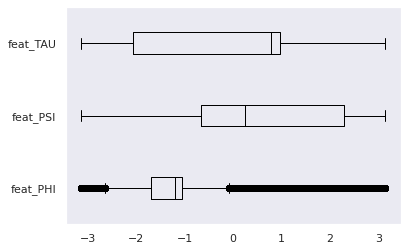

In [ ]:
train_cleaned.boxplot(column=['feat_PHI', 'feat_PSI', 'feat_TAU'], grid=False, color='black', vert=False)

In [ ]:
# Analyzing Skewness and Kurtosis across interval columns
print("Skewness:", end='\n')
train_cleaned[['feat_PHI', 'feat_PSI', 'feat_TAU', 'feat_THETA', 'feat_BBSASA', 'feat_SCSASA']].skew(axis=0)

Skewness:


feat_PHI       1.541639
feat_PSI      -0.073942
feat_TAU      -0.214970
feat_THETA    -0.930561
feat_BBSASA    1.109624
feat_SCSASA    0.713635
dtype: float64

In [ ]:
print("Kurtosis:", end='\n')
train_cleaned[['feat_PHI', 'feat_PSI', 'feat_TAU', 'feat_THETA', 'feat_BBSASA', 'feat_SCSASA']].kurt(axis=0)

Kurtosis:


feat_PHI       3.238840
feat_PSI      -1.298471
feat_TAU      -1.234352
feat_THETA     4.553022
feat_BBSASA    0.502942
feat_SCSASA   -0.331014
dtype: float64

<AxesSubplot:ylabel='Frequency'>

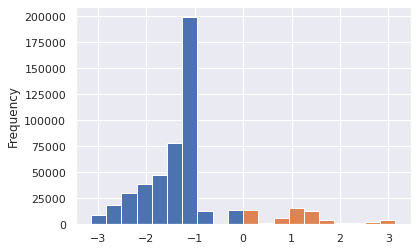

In [ ]:
train_cleaned[train_cleaned['feat_PHI'] <= 0]['feat_PHI'].plot.hist()
train_cleaned[train_cleaned['feat_PHI'] >= 0]['feat_PHI'].plot.hist()

<AxesSubplot:>

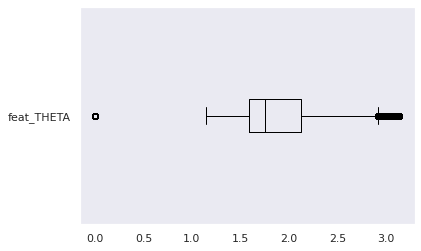

In [ ]:
train_cleaned.boxplot(column='feat_THETA', grid=False, color='black', vert=False)

In [ ]:
train_cleaned['feat_THETA'][train_cleaned['feat_THETA'] == 0].count()

12689

<AxesSubplot:>

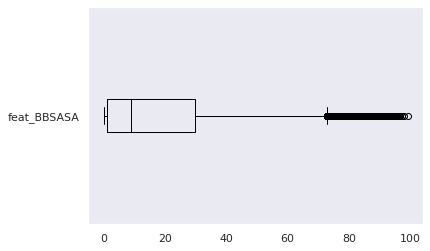

In [ ]:
train_cleaned.boxplot(column='feat_BBSASA', grid=False, color='black', vert=False)

<AxesSubplot:>

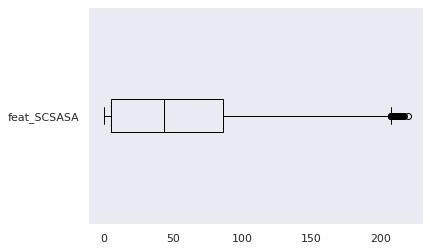

In [ ]:
train_cleaned.boxplot(column='feat_SCSASA', grid=False, color='black', vert=False)

In [ ]:
train_cleaned['feat_SCSASA'][train_cleaned['feat_THETA'] <= 0].count()

12689

<AxesSubplot:>

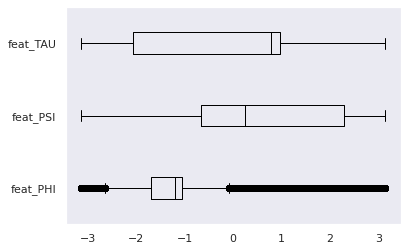

In [ ]:
train_cleaned.boxplot(column=['feat_PHI', 'feat_PSI', 'feat_TAU'], grid=False, color='black', vert=False)

<AxesSubplot:xlabel='feat_BBSASA', ylabel='Density'>

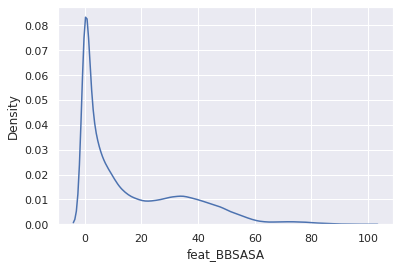

In [ ]:
sns.kdeplot(train_cleaned['feat_BBSASA'])

<AxesSubplot:xlabel='feat_SCSASA', ylabel='Density'>

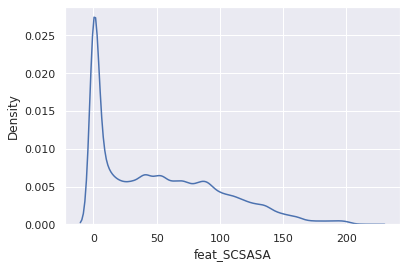

In [ ]:
sns.kdeplot(train_cleaned['feat_SCSASA'])

<AxesSubplot:xlabel='feat_DSSP_6', ylabel='Density'>

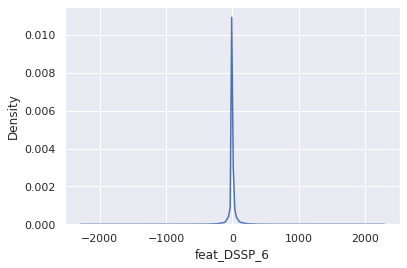

In [ ]:
sns.kdeplot(train_cleaned['feat_DSSP_6'])

## 3. Feature Engineering

In [ ]:
# Possible Approaches for selection process:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

## 4. Model Selection, Training, and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_cleaned.drop(["y_Ligand"], axis=1), train_cleaned["y_Ligand"], test_size=0.2, random_state=42)

In [ ]:
# Try Shuffling test-train data if needed

In [ ]:
without_categorical_columns = [col for col in X_train.columns if X_train[col].dtype != "O"]

In [ ]:
# Test scaling on continuous numerical columns (excluding categorical and ID columns)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=[-1, 1])
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)

In [ ]:
# Initializing models for selection, training, and evaluation loop
# Credits to Jason Brownlee from ML Mastery for this part of the code
# Source: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

models = []

models.append(('XGB', XGBClassifier(tree_method='gpu_hist')))
models.append(('ADA', AdaBoostClassifier()))
# models.append(('LR', LogisticRegression(solver='saga', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
models.append(('BG', BaggingClassifier()))

In [ ]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

In [ ]:
seed = 7 # Configuration for cross validation test harness
results = []
names = []
scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10) # , random_state=seed
    cv_results = model_selection.cross_val_score(
        model, 
        X_train[without_categorical_columns], 
        y_train,
        cv=kfold, 
        scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGB: 0.842499 (0.004429)
ADA: 0.819739 (0.004774)
LDA: 0.746967 (0.004277)
NB: 0.737317 (0.003152)
BG: 0.767900 (0.005206)


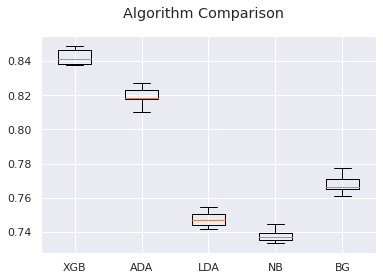

In [ ]:
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Using HYPEROPT for tuning XGBoost
# Source: https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook#4.-Bayesian-Optimization-with-HYPEROPT-
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5) #  <---- Replace with (ROC-AUC + PR-AUC)/2
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='gpu_hist') # to enable GPU training, pass in the tree_method='gpu_hist' parameter
xgb.fit(X_train[without_categorical_columns], y_train)

In [ ]:
y_test_pred = xgb.predict(X_test[without_categorical_columns])

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
auc_roc = metrics.auc(fpr, tpr)

precision, recall, _ = metrics.precision_recall_curve(y_test, y_test_pred)
auc_pr = metrics.auc(recall, precision)

print(f"ROC-AUC: {auc_roc} \n PR-AUC {auc_pr}")

## 6. Deep Learning Approach

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Using Keras Functional API
from keras.models import Sequential, Model
from keras.layers import Dense

def sample_model_1():
    '''Sample MLP/feed-forward neural net as a baseline'''
    inputs = keras.Input(shape=(48, 1))

    x = Dense(144, activation='sigmoid')(inputs)
    x = Dense(72, activation='sigmoid')(x)
    x = Dense(72, activation='sigmoid')(x)
    x = Dense(36, activation='tanh')(x)
    x = Dense(9, activation='tanh')(x)
    
    outputs = Dense(1, activation='tanh')(x)

    return Model(inputs=inputs, outputs=outputs)

In [ ]:
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

sample_model_1 = sample_model_1()

sample_model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.AUC(curve='ROC'), tf.keras.metrics.AUC(curve='PR')]
)